# Face Detection
# Dataset is coming from https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/

In [2]:
DATASET_LOCATION = 'D:\\Data\\face'
WIKI_DATASET_LOCATION = 'D:\\Data\\face\\wiki'
wiki_mat_file_name = 'wiki'
IMDB_DATASET_LOCATION = 'D:\\Data\\face\\imdb'
imdb_mat_file_name = 'imdb'

In [3]:
import json
import os
import math
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import scipy.io
import random

### Handle WIKI and IMDB Mat File - Load them into pandas dataframe

In [4]:
def load_annotation(DATASET_LOCATION, filename):
    annotation = scipy.io.loadmat(os.path.join(DATASET_LOCATION + '\\', '{:s}.mat'.format(filename)))
    return annotation

In [5]:
wiki_mat_file = load_annotation(WIKI_DATASET_LOCATION, wiki_mat_file_name)
imdb_mat_file = load_annotation(IMDB_DATASET_LOCATION, imdb_mat_file_name)

In [6]:
wiki_mat_file

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Jan 16 16:25:20 2016',
 '__version__': '1.0',
 '__globals__': [],
 'wiki': array([[(array([[723671, 703186, 711677, ..., 720620, 723893, 713846]]), array([[2009, 1964, 2008, ..., 2013, 2011, 2008]], dtype=uint16), array([[array(['17/10000217_1981-05-05_2009.jpg'], dtype='<U31'),
                 array(['48/10000548_1925-04-04_1964.jpg'], dtype='<U31'),
                 array(['12/100012_1948-07-03_2008.jpg'], dtype='<U29'), ...,
                 array(['09/9998109_1972-12-27_2013.jpg'], dtype='<U30'),
                 array(['00/9999400_1981-12-13_2011.jpg'], dtype='<U30'),
                 array(['80/999980_1954-06-11_2008.jpg'], dtype='<U29')]],
               dtype=object), array([[1., 1., 1., ..., 1., 1., 0.]]), array([[array(['Sami Jauhojärvi'], dtype='<U15'),
                 array(['Dettmar Cramer'], dtype='<U14'),
                 array(['Marc Okrand'], dtype='<U11'), ...,
                 array(['Michael 

In [7]:
imdb_mat_file

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Jan 17 11:30:27 2016',
 '__version__': '1.0',
 '__globals__': [],
 'imdb': array([[(array([[693726, 693726, 693726, ..., 726831, 726831, 726831]]), array([[1968, 1970, 1968, ..., 2011, 2011, 2011]], dtype=uint16), array([[array(['01/nm0000001_rm124825600_1899-5-10_1968.jpg'], dtype='<U43'),
                 array(['01/nm0000001_rm3343756032_1899-5-10_1970.jpg'], dtype='<U44'),
                 array(['01/nm0000001_rm577153792_1899-5-10_1968.jpg'], dtype='<U43'),
                 ...,
                 array(['08/nm3994408_rm926592512_1989-12-29_2011.jpg'], dtype='<U44'),
                 array(['08/nm3994408_rm943369728_1989-12-29_2011.jpg'], dtype='<U44'),
                 array(['08/nm3994408_rm976924160_1989-12-29_2011.jpg'], dtype='<U44')]],
               dtype=object), array([[1., 1., 1., ..., 0., 0., 0.]]), array([[array(['Fred Astaire'], dtype='<U12'),
                 array(['Fred Astaire'], dtype='<U12'),

###### There are two additional attribtues only in IMDB. They are celeb_names, celeb_id 

In [8]:
imdb_df = pd.DataFrame(columns=['dob','photo_taken','full_path','gender','name',
                           'face_location','face_score','second_face_score','source',
                           'celeb_names', 'celeb_id'])
wiki_df = pd.DataFrame(columns=['dob','photo_taken','full_path','gender','name',
                           'face_location','face_score','second_face_score','source'])

In [9]:
# parsing arrays inside arrays in mat file  
def create_imdb_df_from_matfile():
    for k,v in imdb_mat_file.items():
        #print(k)
        if (k == 'imdb'):
            #print(len(v[0][0]))
            #print(type(v[0][0][0]))
            dob = v[0][0][0]
            photo_taken = v[0][0][1]
            full_path = v[0][0][2]
            gender = v[0][0][3]
            name = v[0][0][4]
            face_location = v[0][0][5]
            face_score = v[0][0][6]
            second_face_score = v[0][0][7]        
            imdb_df['dob'] = dob[0]
            imdb_df['photo_taken'] = photo_taken[0]
            imdb_df['full_path'] = full_path[0]
            imdb_df['gender'] = gender[0]
            imdb_df['name'] = name[0]
            imdb_df['face_location'] = face_location[0]
            imdb_df['face_score'] = face_score[0]
            imdb_df['second_face_score'] = second_face_score[0]
            if (len(v[0][0]) > 8):
                celeb_names = v[0][0][8]
                #print(celeb_names)
                #print(len(celeb_names[0]))
                celeb_id = v[0][0][9]
                imdb_df['celeb_names'] = pd.Series(celeb_names[0])
                imdb_df['celeb_id'] = v[0][0][9][0]
                imdb_df['source'] = 'imdb'

In [10]:
def create_wiki_df_from_matfile():
     for k,v in wiki_mat_file.items():
        if (k == 'wiki'):
            dob = v[0][0][0]
            photo_taken = v[0][0][1]
            full_path = v[0][0][2]
            gender = v[0][0][3]
            name = v[0][0][4]
            face_location = v[0][0][5]
            face_score = v[0][0][6]
            second_face_score = v[0][0][7]        
            wiki_df['dob'] = dob[0]
            wiki_df['photo_taken'] = photo_taken[0]
            wiki_df['full_path'] = full_path[0]
            wiki_df['gender'] = gender[0]
            wiki_df['name'] = name[0]
            wiki_df['face_location'] = face_location[0]
            wiki_df['face_score'] = face_score[0]
            wiki_df['second_face_score'] = second_face_score[0]
            wiki_df['source'] = 'wiki'


In [11]:
create_imdb_df_from_matfile()
create_wiki_df_from_matfile()

In [12]:
wiki_df.shape

(62328, 9)

In [13]:
imdb_df.shape

(460723, 11)

In [14]:
df = imdb_df.copy()
df = df.append(wiki_df, ignore_index=True)

C:\Users\MSS\AppData\Local\Temp\ipykernel_21796\3078783123.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(wiki_df, ignore_index=True)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523051 entries, 0 to 523050
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dob                523051 non-null  int32  
 1   photo_taken        523051 non-null  uint16 
 2   full_path          523051 non-null  object 
 3   gender             511946 non-null  float64
 4   name               523051 non-null  object 
 5   face_location      523051 non-null  object 
 6   face_score         523051 non-null  float64
 7   second_face_score  217893 non-null  float64
 8   source             523051 non-null  object 
 9   celeb_names        20284 non-null   object 
 10  celeb_id           460723 non-null  float64
dtypes: float64(4), int32(1), object(5), uint16(1)
memory usage: 38.9+ MB


In [16]:
df.sample(n=5)

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,source,celeb_names,celeb_id
10640,716790,2005,[29/nm0000129_rm2619902976_1962-7-3_2005.jpg],1.0,[Tom Cruise],"[[1, 1, 2048, 1365]]",-inf,NaN,imdb,[Kathryn Boyd],19084.0
501561,720238,2006,[35/8469935_1971-12-11_2006.jpg],1.0,[Michael Mayer],"[[138.11816488834953, 80.93559618487055, 240.1...",4.234351,NaN,wiki,NaN,NaN
436679,721787,2005,[61/nm1989961_rm1236515072_1976-3-8_2005.jpg],1.0,[Hines Ward],"[[1, 1, 427, 640]]",-inf,NaN,imdb,NaN,7592.0
323071,717777,2004,[04/nm0749104_rm2210110208_1965-3-16_2004.jpg],0.0,[Belén Rueda],"[[60.93731587923189, 91.13497381884783, 196.28...",4.187987,NaN,imdb,NaN,1832.0
240908,727879,2010,[80/nm2913280_rm3531571456_1992-11-11_2010.jpg],0.0,[Ashleigh Cummings],"[[1090.26, 364.5, 1321.92, 596.1600000000001]]",3.544990,3.468892,imdb,NaN,1522.0


In [17]:
df['gender'].unique()

array([ 1.,  0., nan])

In [18]:
df.loc[df['gender'].isnull()]

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,source,celeb_names,celeb_id
504,697695,1975,[41/nm0000041_rm1523811584_1910-3-23_1975.jpg],NaN,[Akira Kurosawa],"[[1, 1, 2048, 1488]]",-inf,NaN,imdb,[Alexander Gould],293.0
505,697695,1985,[41/nm0000041_rm1970598912_1910-3-23_1985.jpg],NaN,[Akira Kurosawa],"[[1349.4732158255033, 564.4715065939597, 2355....",1.445796,NaN,imdb,[Alexander Karim],293.0
506,697695,2011,[41/nm0000041_rm2542647552_1910-3-23_2011.jpg],NaN,[Akira Kurosawa],"[[714.096, 112.75200000000001, 913.152, 311.808]]",1.877696,1.755831,imdb,[Alexander Leeb],293.0
507,697695,1991,[41/nm0000041_rm2930293504_1910-3-23_1991.jpg],NaN,[Akira Kurosawa],"[[764.617200273723, 214.82937607664246, 901.04...",1.531239,1.319597,imdb,[Alexander Ludwig],293.0
508,697695,1990,[41/nm0000041_rm3186735616_1910-3-23_1990.jpg],NaN,[Akira Kurosawa],"[[1542.144, 329.728, 1835.008, 622.592]]",3.374535,3.231167,imdb,[Alexander Martella],293.0
...,...,...,...,...,...,...,...,...,...,...,...
522907,724415,2013,[29/39999929_1983-05-19_2013.jpg],NaN,[Rhatha Phongam],"[[113.52, 141.67999999999998, 366.08, 394.2399...",5.315355,NaN,wiki,NaN,NaN
522908,728039,2012,[77/39999977_1993-04-20_2012.jpg],NaN,[User:Devrajjain90],"[[1, 1, 1, 1]]",-inf,NaN,wiki,NaN,NaN
522940,717950,1960,[90/5992790_1965-09-05_1960.jpg],NaN,[Mark Ferner],"[[1, 1, 47, 100]]",-inf,NaN,wiki,NaN,NaN
522984,720020,1970,[65/7990565_1971-05-07_1970.jpg],NaN,[Dave Karpa],"[[1, 1, 47, 100]]",-inf,NaN,wiki,NaN,NaN


###### We have 11K rows for which gender column is null value. But let us not worry about it  much.

In [19]:
df['flat_name'] = [','.join(map(str, l)) for l in df['name']]

In [20]:
df['flat_name'] = df[['flat_name']].apply(lambda x: x.str.strip()).replace('', np.nan)

In [21]:
df.loc[df['flat_name'].isnull()]

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,source,celeb_names,celeb_id,flat_name
461141,727625,2012,[13/30065213_1992-03-02_2012.jpg],NaN,[],"[[204.6986739046871, 21.733380059105563, 267.4...",3.787709,2.861911,wiki,NaN,NaN,NaN
461857,723834,1981,[04/41022104_1981-10-15_1981.jpg],NaN,[],"[[1, 1, 120, 100]]",-inf,NaN,wiki,NaN,NaN,NaN
461956,717035,2007,[22/41095522_1963-03-05_2007.jpg],NaN,[],"[[114.05927764383254, 189.51212940638757, 181....",3.158360,NaN,wiki,NaN,NaN,NaN
462086,721684,2011,[36/12019336_1975-11-26_2011.jpg],NaN,[],"[[122.34718543654704, 43.620065448193074, 186....",3.179007,NaN,wiki,NaN,NaN,NaN
462754,720034,2011,[28/13002228_1971-05-21_2011.jpg],NaN,[],"[[205.24538522050582, 149.50937106945878, 371....",3.986678,NaN,wiki,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
521351,726417,2012,[23/46956423_1988-11-10_2012.jpg],NaN,[],"[[117.90672449902527, 42.383401606794735, 193....",4.597936,NaN,wiki,NaN,NaN,NaN
521560,724133,2015,[08/1795208_1982-08-10_2015.jpg],NaN,[],"[[150.26902479526478, 96.91580165409877, 245.4...",4.443247,0.884257,wiki,NaN,NaN,NaN
521738,689894,1942,[91/27971591_1888-11-11_1942.jpg],NaN,[],"[[1, 1, 520, 400]]",-inf,NaN,wiki,NaN,NaN,NaN
521931,711992,2008,[44/5790344_1949-05-14_2008.jpg],NaN,[],"[[1, 1, 286, 410]]",-inf,NaN,wiki,NaN,NaN,NaN


###### We have 124 rows for which we dont have label. We can remove it.

In [22]:
df.loc[df.face_score < 0]

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,source,celeb_names,celeb_id,flat_name
30,702986,2007,[02/nm0000002_rm3587741952_1924-9-16_2007.jpg],0.0,[Lauren Bacall],"[[1, 1, 323, 485]]",-inf,NaN,imdb,[Aaron Jackson],11516.0,Lauren Bacall
49,706650,1963,[03/nm0000003_rm2017653760_1934-9-28_1963.jpg],0.0,[Brigitte Bardot],"[[1, 1, 2126, 4842]]",-inf,NaN,imdb,[Aaron Spelling],2585.0,Brigitte Bardot
54,706650,1963,[03/nm0000003_rm2135094272_1934-9-28_1963.jpg],0.0,[Brigitte Bardot],"[[1, 1, 5280, 1331]]",-inf,NaN,imdb,[Aaron Woodley],2585.0,Brigitte Bardot
58,706650,1965,[03/nm0000003_rm3261053696_1934-9-28_1965.jpg],0.0,[Brigitte Bardot],"[[1, 1, 1023, 1023]]",-inf,NaN,imdb,[Aasif Mandvi],2585.0,Brigitte Bardot
76,711882,1978,[04/nm0000004_rm1744744448_1949-1-24_1978.jpg],1.0,[John Belushi],"[[1, 1, 1381, 2048]]",-inf,NaN,imdb,[Abigail Mavity],9474.0,John Belushi
...,...,...,...,...,...,...,...,...,...,...,...,...
523030,699933,1973,[65/9994165_1916-05-08_1973.jpg],0.0,[Sylvia Sleigh],"[[1, 1, 320, 440]]",-inf,NaN,wiki,NaN,NaN,Sylvia Sleigh
523032,717339,2008,[53/9996353_1964-01-03_2008.jpg],1.0,[Luis Rivera],"[[1, 1, 497, 400]]",-inf,NaN,wiki,NaN,NaN,Luis Rivera
523043,711109,1968,[65/9996865_1946-12-13_1968.jpg],1.0,[Pierino Prati],"[[1, 1, 372, 560]]",-inf,NaN,wiki,NaN,NaN,Pierino Prati
523047,711338,1970,[32/9997032_1947-07-30_1970.jpg],1.0,[Nico Rijnders],"[[1, 1, 285, 440]]",-inf,NaN,wiki,NaN,NaN,Nico Rijnders


In [23]:
df.drop(df[(df['face_score'] < 0) | (df['flat_name'].isnull())].index,inplace=True)

In [24]:
df.shape

(442624, 12)

In [25]:
def get_image_from_disk(random_image_file, source, face_location_list):
    fqcn = DATASET_LOCATION + '\\' + source + '\\' + random_image_file
    #print(fqcn)
    img = cv2.imread(fqcn)
    #print(face_location_list)
    x0 = face_location_list[0][0][0]
    y0 = face_location_list[0][0][1]
    x1 = face_location_list[0][0][2]
    y1 = face_location_list[0][0][3]
    start_point = (int(x0), int(y0))
    end_point = (int(x1), int(y1))
    img = cv2.rectangle(img, start_point, end_point, color= (36,255,12), thickness=10)
    #print(img)
    return img

def add_label(img, label):
    img = cv2.putText(img, label, (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 4)
    #print(img)
    return img

def display_some_random_image(random_image_file, source, obj):
    img = get_image_from_disk(random_image_file, source, obj)
    label = df.loc[df.full_path == random_image_file, 'flat_name'].values[0]
    img = add_label(img, label)
    #fig = plt.figure(figsize=(20, 20))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))    #cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.show()

In [26]:
random_image_file = '09/9998109_1972-12-27_2013.jpg'

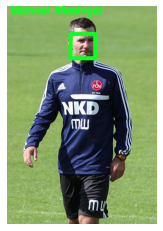

In [27]:
face_location_object = df.loc[df.full_path == random_image_file, 'face_location']
#print(face_location_object)
display_some_random_image(random_image_file, "wiki", face_location_object.tolist())

### Pick random images and display image with label 

In [28]:
df.reset_index(inplace=True)

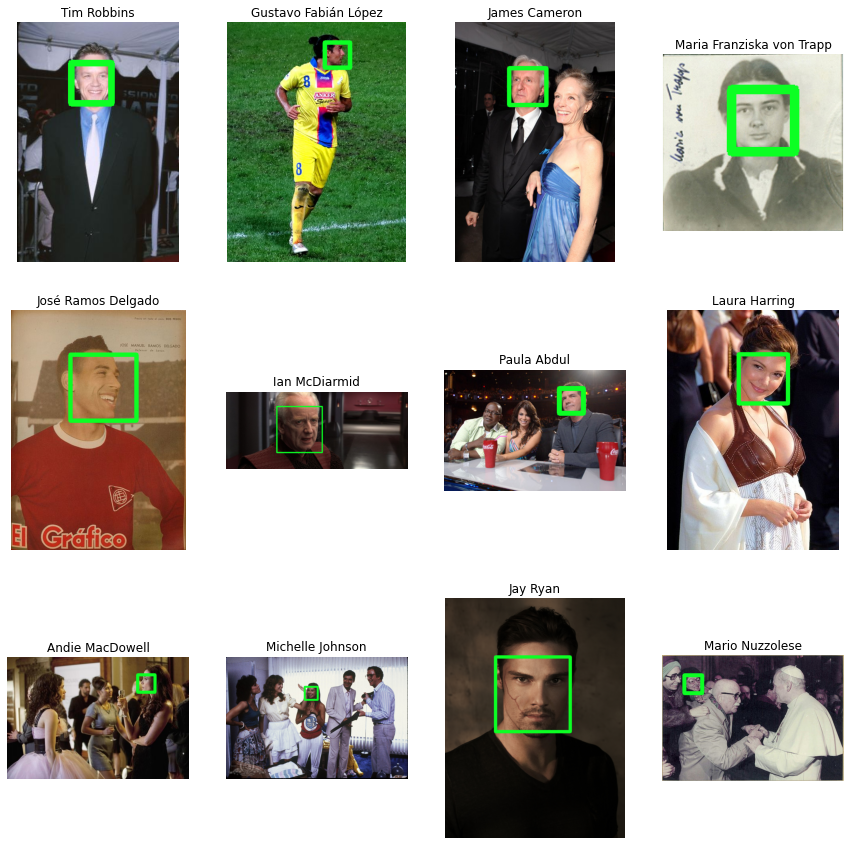

In [30]:
N=12
Max = len(df)
plt.figure(figsize=(15, 15))
for i in range(N):
    plt.subplot(3, 4, i+1)
    loc = -1
    random_image_file = ""
    source = ""
    # Following loop to check if we have image file present in our disk
    while loc < 0:
        loc = random.randint(1, Max)  
        # Random image file is not a string - it is an array
        random_image_file = df.loc[loc, 'full_path'][0]
        source = df.loc[loc, 'source']
        fqcn = DATASET_LOCATION + '\\' + source + '\\' + random_image_file
        if os.path.isfile(fqcn):
            break
        else:
            loc = -1        
    label = df.loc[loc, 'flat_name']       
    obj = df.loc[loc, 'face_location']
    img = get_image_from_disk(random_image_file, source, [obj.tolist()])
    #img = add_label(img, label)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("{}".format(label))
    plt.axis('off')
    
plt.show()

### Process the images

In [32]:
# Peek and check image size to get an idea
import imagesize

Max = len(df)
for i in range(10):
    loc = -1
    while loc < 0:
        loc = random.randint(1, Max)  
        random_image_file = df.loc[loc, 'full_path'][0]
        fqcn = DATASET_LOCATION + '\\' + source + '\\' + random_image_file
        if os.path.isfile(fqcn):
            break
        else:
            loc = -1
    width, height = imagesize.get(fqcn)
    print(f"{i+1} -> {fqcn} -> {width} * {height}")

1 -> D:\Data\face\wiki\16/45256416_1991-11-24_2014.jpg -> 440 * 587
2 -> D:\Data\face\wiki\74/741874_1972-01-30_2013.jpg -> 470 * 313
3 -> D:\Data\face\wiki\49/6008849_1987-04-08_2009.jpg -> 440 * 654
4 -> D:\Data\face\wiki\09/7999409_1868-11-10_1955.jpg -> 249 * 356
5 -> D:\Data\face\wiki\49/44599649_1988-09-11_2010.jpg -> 360 * 545
6 -> D:\Data\face\wiki\54/25887854_1991-07-27_2012.jpg -> 450 * 675
7 -> D:\Data\face\wiki\22/3860622_1930-10-14_2009.jpg -> 215 * 300
8 -> D:\Data\face\wiki\05/2238205_1968-05-07_2013.jpg -> 440 * 293
9 -> D:\Data\face\wiki\30/391030_1907-02-15_1973.jpg -> 440 * 761
10 -> D:\Data\face\wiki\16/2743116_1912-06-04_1945.jpg -> 440 * 453


In [74]:
# Peek and check the count per name
print(df['flat_name'].value_counts())

Jennifer Aniston      797
Brad Pitt             747
Angelina Jolie        709
Courteney Cox         692
Tom Cruise            677
                     ... 
Mark Collie             1
Alexis Tipton           1
Kim Clijsters           1
Max Clifford            1
Greta Van Susteren      1
Name: flat_name, Length: 57864, dtype: int64


###### The min is 1 and maxi 797 - note this is a sample dataset. The full and original dataset might have more

<AxesSubplot:>

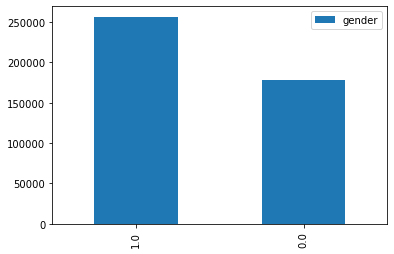

In [87]:
# Peek and check count per gender
df['gender'].value_counts().plot(kind = 'bar', legend=True)

<AxesSubplot:>

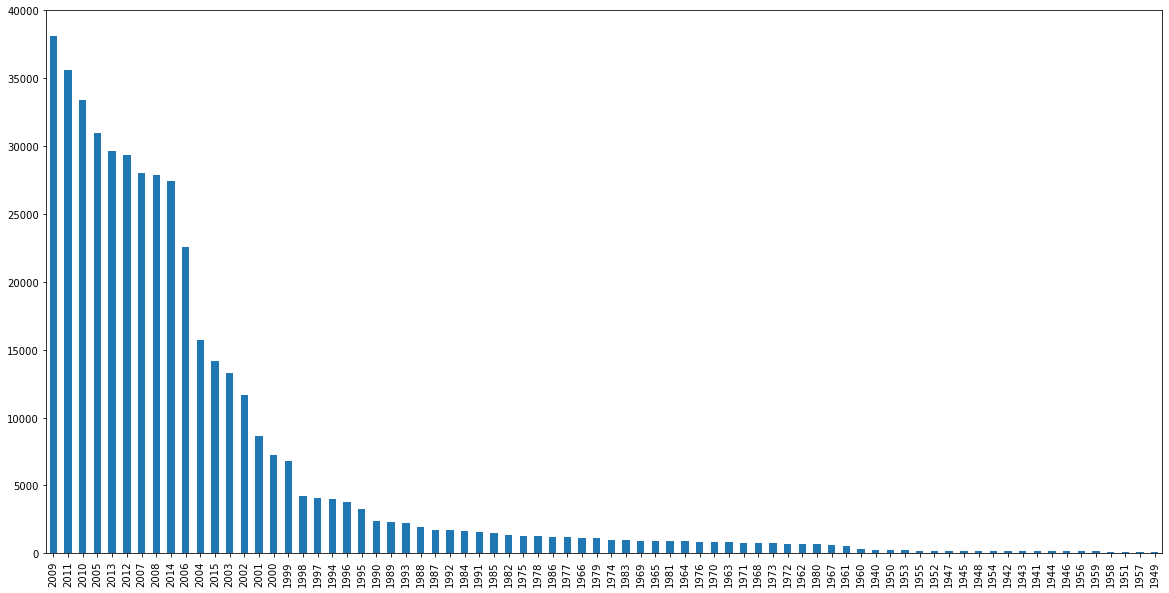

In [131]:
plt.figure(figsize=(20, 10))
df['photo_taken'].value_counts().plot(kind = 'bar')

In [ ]:
# TODO:
# Display number of photos available per photo_taken per flat_name
# Traverse through the dataframe, load image once and create multiple column on the dataframe
#     is_corrupted_image, is_white, is_black, is_bb_inside, image, is_bounding_box_in_range, 
#     Normalize image to 32 * 32 and update bounding box as (face_location_new)

### Prepare for model building

In [132]:
FILTER_SIZE=300

In [133]:
# Take images where we have 400+ as count and create approximately 50K samples
FLAT_NAME_LIST = df['flat_name'].groupby(df['flat_name']).filter(lambda x: len(x) > FILTER_SIZE).\
                            value_counts().index.tolist()
print(FLAT_NAME_LIST)

['Jennifer Aniston', 'Brad Pitt', 'Angelina Jolie', 'Courteney Cox', 'Tom Cruise', 'Robert Downey Jr.', 'Nicole Kidman', 'Zooey Deschanel', 'Neil Patrick Harris', 'Robert De Niro', 'Jim Parsons', 'Will Smith', 'Emily Deschanel', 'Jensen Ackles', 'George Clooney', 'Bruce Willis', 'Charlize Theron', 'Leighton Meester', 'Jennifer Garner', 'Johnny Depp', 'Nathan Fillion', 'Matthew McConaughey', 'Cameron Diaz', 'Drew Barrymore', 'David Boreanaz', 'Reese Witherspoon', 'Jared Padalecki', 'Leonardo DiCaprio', 'Amy Poehler', 'Matt Damon', 'Blake Lively', 'Kristen Stewart', 'Jon Hamm', 'Matthew Perry', 'Nicolas Cage', 'Mark Wahlberg', 'Julianne Moore', 'Will Ferrell', 'Scarlett Johansson', 'Adam Sandler', 'Tom Hanks', 'Steve Carell', 'Harrison Ford', 'Stana Katic', 'Simon Baker', 'Jason Segel', 'Clint Eastwood', 'Ben Stiller', 'John Travolta', 'Anne Hathaway', 'Sarah Jessica Parker', 'Jessica Alba', 'Tina Fey', 'Julianna Margulies', 'Meryl Streep', 'Johnny Galecki', 'Sandra Bullock', 'Jennifer L

In [134]:
len(FLAT_NAME_LIST)

151

In [ ]:
IMAGE_LIST_PER_NAME = 300
required_sample_size = 50000
new_df = pd.DataFrame(columns=['image_location','name'])
new_df_i = 0
for name in FLAT_NAME_LIST:
    temp_df = df.loc[df.flat_name == name, ['full_path','source']].reset_index(drop=True)   
    count = 0
    for i in range(0, 1000000):        
        loc = random.randint(1, len(temp_df) - 1)  
        random_image_file = temp_df.loc[loc, 'full_path'][0]
        fqcn = DATASET_LOCATION + '\\' + source + '\\' + random_image_file
        #print(fqcn)
        if os.path.isfile(fqcn):
            #print(fqcn)
            new_df.loc[new_df_i, 'image_location'] = fqcn
            new_df.loc[new_df_i, 'name'] = name
            new_df_i = new_df_i + 1
            if (new_df_i % IMAGE_LIST_PER_NAME == 0):
                print(f"Found {IMAGE_LIST_PER_NAME} for {name} and index is {new_df_i}")
                break
        else:
            loc = -1
        count = count + 1
        if (count >= 1000000):
            print(f"Reached maximum retry for {name}")
            new_df_i = new_df_i + (IMAGE_LIST_PER_NAME - new_df_i % IMAGE_LIST_PER_NAME) 
new_df

Found 300 for Jennifer Aniston and index is 300
Reached maximum retry for Brad Pitt
Found 300 for Angelina Jolie and index is 900
Found 300 for Courteney Cox and index is 1200
Found 300 for Tom Cruise and index is 1500
Reached maximum retry for Robert Downey Jr.
Found 300 for Nicole Kidman and index is 2100
Found 300 for Zooey Deschanel and index is 2400
Found 300 for Neil Patrick Harris and index is 2700
Reached maximum retry for Robert De Niro
Found 300 for Jim Parsons and index is 3300
Found 300 for Will Smith and index is 3600
Found 300 for Emily Deschanel and index is 3900
Found 300 for Jensen Ackles and index is 4200
Found 300 for George Clooney and index is 4500
Found 300 for Bruce Willis and index is 4800
Found 300 for Charlize Theron and index is 5100
Found 300 for Leighton Meester and index is 5400
Found 300 for Jennifer Garner and index is 5700
Reached maximum retry for Johnny Depp
Found 300 for Nathan Fillion and index is 6300
Found 300 for Matthew McConaughey and index is 